<a href="https://colab.research.google.com/github/Soham-123-code/Tensorflow/blob/main/Fashioin_MNIST_ML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.2 MB 8.2 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [22]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math 
import numpy as np
import matplotlib.pyplot as plt


In [23]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [24]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [25]:
class_names = metadata.features['label'].names 
print("Class names: {} ".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 


In [26]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of Test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of Test examples: 10000


In [27]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

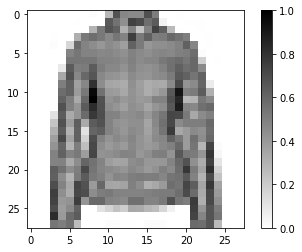

In [28]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

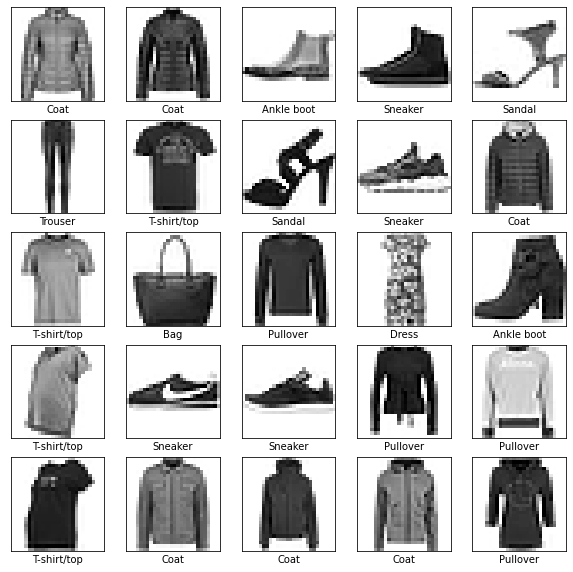

In [29]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [30]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)                            
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [33]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_test_examples/BATCH_SIZE))

Epoch 1/5
313/313 [==============================] - 11s 3ms/step - loss: 0.6976 - accuracy: 0.7591
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.8166
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.8289
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4425 - accuracy: 0.8419
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8452


In [34]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on the test dataset', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.4413 - accuracy: 0.8436
Accuracy on the test dataset 0.8435999751091003


In [35]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [36]:
predictions.shape

(32, 10)

In [37]:
predictions[0]

array([2.8903713e-04, 1.2341510e-03, 2.8405618e-02, 3.1992028e-04,
       8.7496722e-01, 3.9199431e-06, 9.4571665e-02, 5.6918443e-06,
       1.9743259e-04, 5.2919563e-06], dtype=float32)

In [38]:
np.argmax(predictions[0])

4

In [39]:
test_labels[0]

4

In [42]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

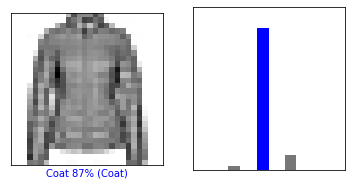

In [43]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

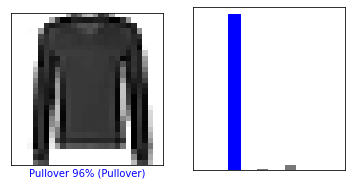

In [44]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

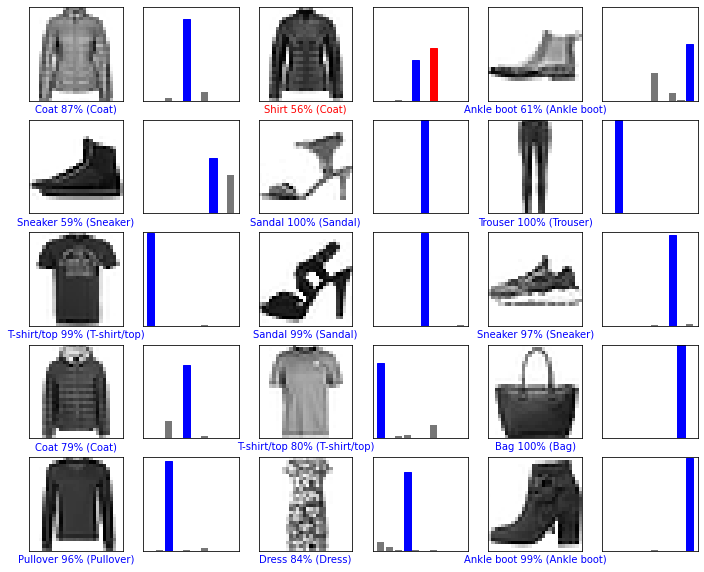

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [54]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [55]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [56]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8903707e-04 1.2341531e-03 2.8405627e-02 3.1992065e-04 8.7496704e-01
  3.9199572e-06 9.4571784e-02 5.6918543e-06 1.9743294e-04 5.2919754e-06]]


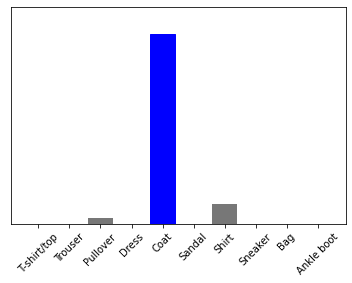

In [60]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [62]:
np.argmax(predictions_single[0])

4